# WiFi Locationing Project

Greg Hepguler   

Title: Evaluate Techniques for Wifi Locationing

Summarize project: 
Outdoor locationing problems can be solved accurately using signals of GPS sensors in the mobile devices
However, indoor locationing is a different problem because the loss of GPS signal in indoor environments
We evaluated the application of machine learning techniques to this problem, replacing the GPS signal with
WAPS signal.



> 
> Import LIBRARIES

In [1]:
# Import libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy  as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from matplotlib.pylab import *
from pylab import rc, rcParams
from math import sqrt

# Regression estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Classification Models
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Normalization
from sklearn.preprocessing import StandardScaler

# RFE, Recursive Feature Elimination
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluating the Classification Algorithm
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Metrics
from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

import plotly.plotly as py
import plotly.tools as tls

from imblearn.over_sampling import SMOTE
import os

#cross validation
#### from sklearn.cross_validation import train_test_split  >> WARNING:
#  DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module 
#  into which all the refactored classes and functions are moved. 
#  Also note that the interface of the new CV iterators are different from that of this module. 
#  This module will be removed in 0.20.
from sklearn.model_selection import train_test_split

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Data Collection and Transformations
import datetime as dt
import time
import pickle
from sklearn.preprocessing import Imputer, StandardScaler
from itertools import cycle

# Statistical Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Regression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Kappa
from sklearn.metrics import cohen_kappa_score

# Plotting 
import matplotlib
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = [10,8]
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

IMPORT DATA 
> Import Training and Test (Validation) Data

In [3]:
# Import Training and Test Data
train = pd.read_csv("UJI_TrainingData.csv")
test = pd.read_csv("UJI_ValidationData.csv")

In [4]:
# Make a copy of the Dataset before Feature Engineering
data_train = train.copy()

> Describe and Visualize the Dataset

In [5]:
# view a sample of the training dataframe 
train.head()
# train.tail()
# Training

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
# understand the makeup of the Training data
train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
# understand the makeup of the Training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [8]:
# understand the makeup of the Test (validation) data
test.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


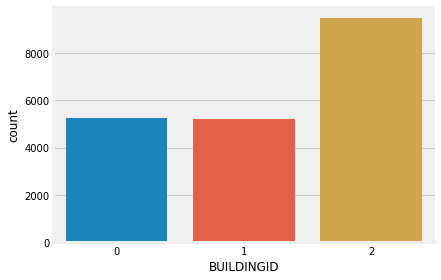

In [9]:
# Use seaborn to plot the Buildings
fg = sns.factorplot('BUILDINGID', data=train, kind='count', aspect=1.5)
fg.set_xlabels('BUILDINGID')

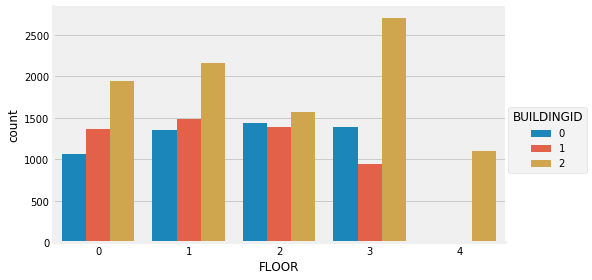

In [10]:
# Again use saeborn to group by FLOOR and BUILDING
g = sns.factorplot('FLOOR', data=train, hue='BUILDINGID', kind='count', aspect=1.75)
g.set_xlabels('FLOOR')

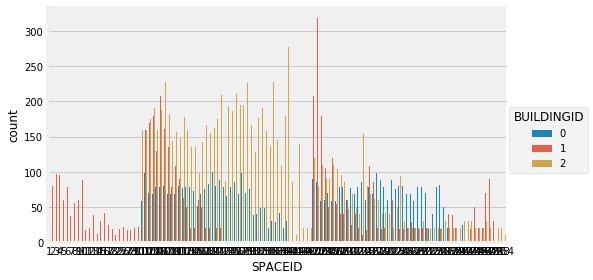

In [11]:
# Again use saeborn to group by SPACEID and BUILDINGID
g = sns.factorplot('SPACEID', data=train, hue='BUILDINGID', kind='count', aspect=1.75)
g.set_xlabels('SPACEID')

> EDA



In [12]:
# Get random SAMPLE of Dataset
seed = 101
train = train.sample(frac=0.20, random_state=seed)
train.info()
# Subset_fraction
# Subset_fraction.head()
train.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 6195 to 3922
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 16.1 MB


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
9960,100,100,100,100,100,100,100,100,-80,100,...,100,-7646.2863,4.864932e+06,2,0,234,2,11,13,1370336119
4684,100,100,100,100,100,100,100,100,100,100,...,100,-7527.4026,4.864929e+06,3,1,101,2,8,1,1371714089
5480,100,100,100,100,100,100,100,100,100,100,...,100,-7417.5584,4.864893e+06,3,1,202,2,9,14,1371716142
10915,100,100,100,100,100,100,100,100,100,100,...,100,-7618.7633,4.864975e+06,3,0,101,2,11,13,1370339857
3922,100,100,100,100,100,100,100,100,100,100,...,100,-7325.2341,4.864818e+06,1,2,128,2,7,6,1371723521


> Remove duplicate rows

In [13]:
train.drop_duplicates(subset=None, keep='first', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3925 entries, 6195 to 3922
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 15.9 MB


In [14]:
Xtrain = train.iloc[:,:520]
Xtest = test.iloc[:,:520]
ytrain = train.iloc[:,520:526]
# ytrain = train.iloc[:,522:525]
ytest = test.iloc[:,520:526]
#ytest = test.iloc[:,522:525]

In [15]:
Xtest.shape

(1111, 520)

In [16]:
Xtrain.shape

(3925, 520)

In [17]:
Xtest.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [18]:
Xtrain.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
6195,100,100,100,100,100,-89,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
13675,100,100,100,100,100,100,100,100,100,100,...,-84,100,100,100,100,100,-66,100,100,100
16554,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
222,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1550,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


> Remove NaN values

In [19]:
# Remove columns with all NaN values  (these columns would have WAP signal 100 as undetected signal)
# all_nan = (Xtrain
#            .isnull()
#            .all(axis=0) == False)
# filtered_cols = (all_nan[all_nan]
#                  .index
#                  .values)

# print("Before removing Xtrain shape", Xtrain.shape)

# Xtrain = Xtrain.loc[:,filtered_cols]
# Xtest = Xtest.loc[:,filtered_cols]

# print("After removing values", Xtrain.shape)

# NO NaN Values -- 

In [20]:
X_raw_train = Xtrain
X_raw_test = Xtest

X_raw_train.shape, X_raw_test.shape

((3925, 520), (1111, 520))

> Correlation Matrix

In [21]:
# check predictors with undetected WAP signal
all_zero= ((Xtrain == 100) 
           .all()==False)
filtered_cols = (all_zero[all_zero]
                 .index
                 .values)

print("Before removing predictors with WAP 100", Xtrain.shape)

X_rm_train = Xtrain.loc[:,filtered_cols]
X_rm_test = Xtest.loc[:,filtered_cols]

print("After removing predictors with WAP 100", Xtrain.shape)


Before removing predictors with WAP 100 (3925, 520)
After removing predictors with WAP 100 (3925, 520)


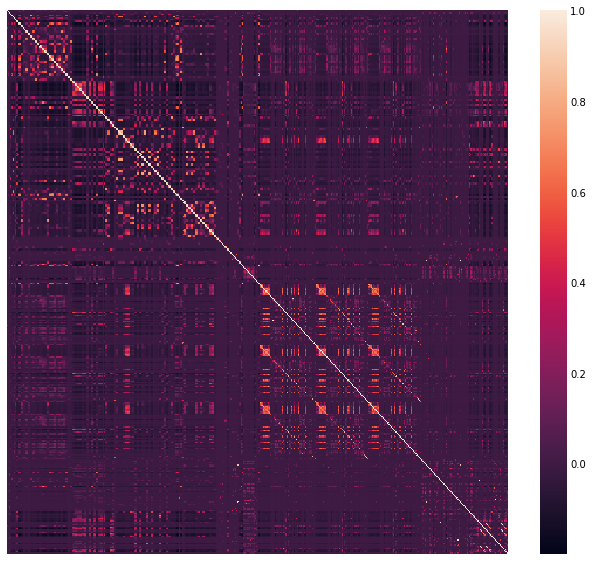

In [22]:
X_train_corr = X_rm_train.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(X_train_corr,xticklabels=False, yticklabels=False)

In [23]:
corr_stack = X_train_corr.stack()
corr_thresh = 0.95

# Total entries in correlation matrix above threshold
Nthresh = (abs(corr_stack) >= corr_thresh).sum()

# Subtracting the correlation of predictor with themselves =1
Nthresh -= 2000

# Pairwise correlations
Nthresh *= 0.25

Nthresh

# no redundant variables that can be eliminated

-388.0

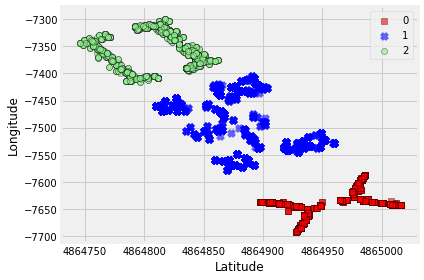

In [24]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(ytrain['BUILDINGID']))])

for idx, cl in enumerate(np.unique(ytrain['BUILDINGID'])):
        plt.scatter(x=ytrain.loc[ytrain.BUILDINGID== cl]['LATITUDE'], 
                    y=ytrain.loc[ytrain.BUILDINGID== cl]['LONGITUDE'],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='upper right')
plt.tight_layout()

Modeling

>> Define "LOCATION"

In [25]:
# CREATE A LOCATION INDEX
train = train.assign(LOCATION = ((train['BUILDINGID']+1)*10000 + (train['FLOOR']+1)*1000 + train['LATITUDE']  / -train['LONGITUDE']).astype(int))
test = test.assign(LOCATION = ((test['BUILDINGID']+1)*10000 + (test['FLOOR']+1)*1000 + test['LATITUDE']  / -test['LONGITUDE']).astype(int))

In [26]:
train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LOCATION
6195,100,100,100,100,100,-89,100,100,100,100,...,-7414.873470,4.864881e+06,2,1,202,1,9,14,1371722885,23656
13675,100,100,100,100,100,100,100,100,100,100,...,-7337.527900,4.864826e+06,3,2,121,2,14,7,1371723430,34663
16554,100,100,100,100,100,100,100,100,100,100,...,-7683.855900,4.864930e+06,3,0,225,2,1,14,1371056249,14633
222,100,100,100,100,100,100,100,100,100,100,...,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713639,23645
1550,100,100,100,100,100,100,100,100,100,100,...,-7507.032078,4.864835e+06,2,1,5,1,4,18,1371735587,23648


In [27]:
test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LOCATION
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,22647
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,35658
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,35659
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,35660
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,13636


In [28]:
test.describe()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 530 entries, WAP001 to LOCATION
dtypes: float64(2), int32(1), int64(527)
memory usage: 4.5 MB


In [30]:
# Define features (predictors / independent var's) and dependent var
Xtrain = train.iloc[:,:520]
Xtest = test.iloc[:,:520]
features = train.iloc[:,:520]

ytrain = train['LOCATION']
ytest = test['LOCATION']
depVar = train['LOCATION']
depVar_test = test['LOCATION']

In [31]:
ytrain.head()

6195     23656
13675    34663
16554    14633
222      23645
1550     23648
Name: LOCATION, dtype: int32

In [32]:
ytest.head()

0    22647
1    35658
2    35659
3    35660
4    13636
Name: LOCATION, dtype: int32

> COMPARE MODELS

In [33]:
# random number seed
seed = 101

# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
               
# Evaluate each model in turn  -- 13.2. Compare Machine Learning Algorithms Consistently 85 --
# 10 fold Cross validation
results = []
presults = []
kresults = []
names = []
mscores = []
scoring = 'accuracy'

# MODEL Accuracy from Cross validation
print("MODEL Cross-Validation Accuracy and STD")
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, depVar, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, 100*cv_results.mean(), cv_results.std())
    print(msg)

print("\nMODEL Scores")
for name, model in models:
    model.fit(Xtrain, depVar)
    Model_score = model.score(Xtrain,depVar)
    mscores.append(Model_score)
    # names.append(name)
    msg_fit = "%s: %f " % (name, 100*Model_score)
    print(msg_fit)
    
# PREDICTION (this section is for single numeric dependent variable)
print("\nMODEL Prediction Accuracy and Kappa")
for name, model in models:
    model.fit(Xtrain, depVar)
    y_pred = model.predict(Xtest) 
    Predict_results = model.score(Xtest, depVar_test)
    # Kappa
    Pred_Kappa = cohen_kappa_score(y_pred, depVar_test, labels=None, weights=None, sample_weight=None)
    presults.append(Predict_results)
    kresults.append(Pred_Kappa)
    # msg = "%s: %f " % (name, 100*Predict_results)
    msg = "%s: %f (%f)" % (name, 100*Predict_results, 100*Pred_Kappa)
    print(msg)
    

MODEL Cross-Validation Accuracy and STD
KNN: 60.662227 (0.015205)
SVM: 9.554383 (0.008943)
RFC: 70.597250 (0.023660)

MODEL Scores
KNN: 76.101911 
SVM: 98.369427 
RFC: 98.140127 

MODEL Prediction Accuracy and Kappa
KNN: 33.663366 (32.702085)
SVM: 2.520252 (0.000000)
RFC: 40.414041 (39.492697)


[Text(0,0,'KNN'), Text(0,0,'SVM'), Text(0,0,'RFC')]

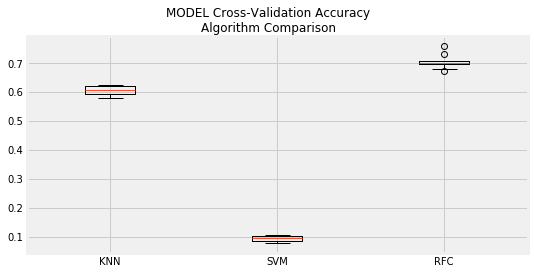

In [34]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(8, 4))
fig.suptitle('MODEL Cross-Validation Accuracy\nAlgorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


Text(0,0.5,'Model  Score')

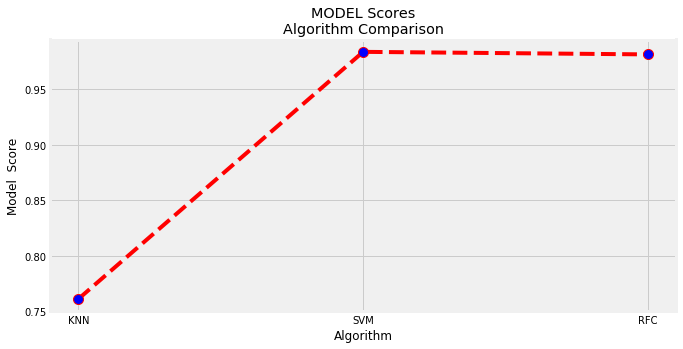

In [35]:
plt.figure(figsize=(10, 5)) 
# plt.plot(names, presults, color='red', linestyle='dashed', marker='o',  
#         markerfacecolor='blue', markersize=10)
plt.plot(names, mscores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(names)
plt.title('MODEL Scores\nAlgorithm Comparison')  
plt.xlabel('Algorithm')  
plt.ylabel('Model  Score')  

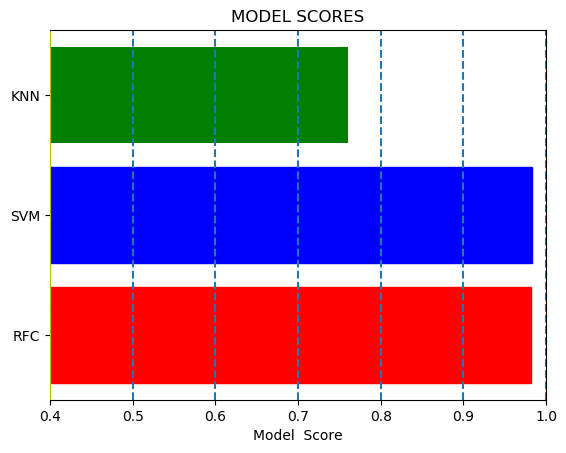

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Horizontal BarPlot Data
y_pos = np.arange(len(names))
# performance = presults
performance = mscores

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Model  Score')
ax.set_title('MODEL SCORES')

valueX = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
plt.xticks(valueX)

#bottom
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('y')

# X-grid lines
for xmaj in ax.xaxis.get_majorticklocs():
  ax.axvline(x=xmaj, ls='--')

plt.xlim((0.4, 1.0))

plt.show()


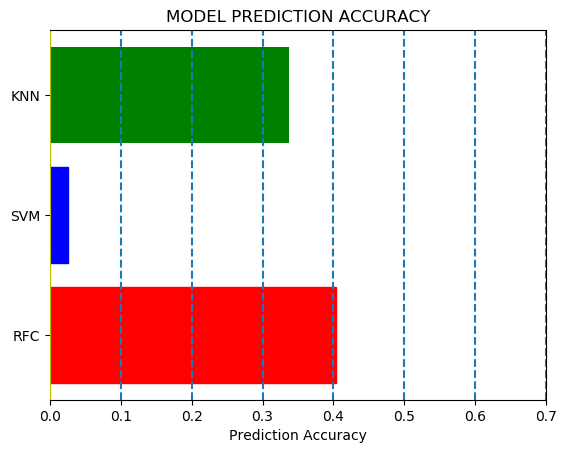

In [37]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Horizontal BarPlot Data
y_pos = np.arange(len(names))
performance = presults

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Prediction Accuracy')
ax.set_title('MODEL PREDICTION ACCURACY')

valueX = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]
plt.xticks(valueX)

#bottom
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('y')

# X-grid lines
for xmaj in ax.xaxis.get_majorticklocs():
  ax.axvline(x=xmaj, ls='--')

plt.xlim((0.0, 0.7))

plt.show()


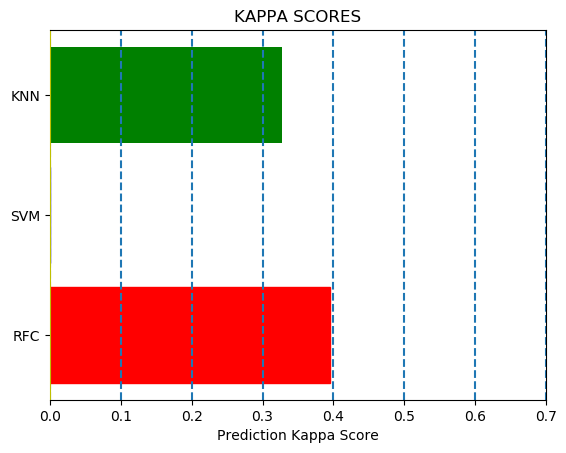

In [38]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Horizontal BarPlot Data
y_pos = np.arange(len(names))
performance = kresults

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Prediction Kappa Score')
ax.set_title('KAPPA SCORES')

valueX = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]
plt.xticks(valueX)

#bottom
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('y')

# X-grid lines
for xmaj in ax.xaxis.get_majorticklocs():
  ax.axvline(x=xmaj, ls='--')

plt.xlim((0.0, 0.7))

plt.show()


TUNING THE MODELS

> kNN Classification

In [39]:
# KNN Tuning
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, 
#                      p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)
# # Brownlee 21.7. Algorithm Tuning p.158 #
seed = 101
num_folds = 5
#scaler = StandardScaler().fit(Xtrain)
#rescaledX = scaler.transform(Xtrain)

neighbors = [1,5,10,20,35,50,75,100,150,200]

weights_values = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights=weights_values)
model = KNeighborsClassifier()

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(Xtrain, depVar)

In [40]:
print("Best KNN CV-Score and Tuning Parameters", (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean CVscore, std, Params:", (mean, stdev, param))

Best KNN CV-Score and Tuning Parameters (0.6670063694267516, {'n_neighbors': 1, 'weights': 'uniform'})
Mean CVscore, std, Params: (0.6670063694267516, 0.01584131623613739, {'n_neighbors': 1, 'weights': 'uniform'})
Mean CVscore, std, Params: (0.6670063694267516, 0.01584131623613739, {'n_neighbors': 1, 'weights': 'distance'})
Mean CVscore, std, Params: (0.5946496815286624, 0.020002839670206895, {'n_neighbors': 5, 'weights': 'uniform'})
Mean CVscore, std, Params: (0.643312101910828, 0.021452773946518094, {'n_neighbors': 5, 'weights': 'distance'})
Mean CVscore, std, Params: (0.5584713375796179, 0.022205104274650618, {'n_neighbors': 10, 'weights': 'uniform'})
Mean CVscore, std, Params: (0.6112101910828025, 0.020276797708098378, {'n_neighbors': 10, 'weights': 'distance'})
Mean CVscore, std, Params: (0.5159235668789809, 0.01896335700986333, {'n_neighbors': 20, 'weights': 'uniform'})
Mean CVscore, std, Params: (0.5801273885350319, 0.01744060238484059, {'n_neighbors': 20, 'weights': 'distance'}

> SVM Classification

In [41]:
# class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, 
#                      shrinking=True, probability=False, tol=0.001, cache_size=200, 
#                      class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, 
#                      random_state=None)

seed = 101
num_folds = 5
#scaler = StandardScaler().fit(Xtrain)
#rescaledX = scaler.transform(Xtrain)

c_values = [0.5, 0.7, 0.9, 1.0, 1.5]
kernel_values = ['rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(Xtrain, depVar)

In [42]:
# Print SVM results
print("Best SVM CV-Score and Tuning Parameters", (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean CV score, CV std  and  Params:", (mean, stdev, param))

Best SVM CV-Score and Tuning Parameters (0.10394904458598726, {'C': 1.5, 'kernel': 'rbf'})
Mean CV score, CV std  and  Params: (0.04076433121019108, 0.007023719109345336, {'C': 0.5, 'kernel': 'rbf'})
Mean CV score, CV std  and  Params: (0.05859872611464968, 0.009634481733089955, {'C': 0.7, 'kernel': 'rbf'})
Mean CV score, CV std  and  Params: (0.08203821656050955, 0.007497548519522119, {'C': 0.9, 'kernel': 'rbf'})
Mean CV score, CV std  and  Params: (0.0889171974522293, 0.006415122706758816, {'C': 1.0, 'kernel': 'rbf'})
Mean CV score, CV std  and  Params: (0.10394904458598726, 0.004940310682717277, {'C': 1.5, 'kernel': 'rbf'})


> RF Classification

In [45]:
# RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#                        warm_start=False, class_weight=None)
# RF example ----
# clf = RandomForestClassifier(n_estimators=10, max_depth=None, 
#                             min_samples_split=2, random_state=None, verbose=1)
seed = 101
num_folds = 5

# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
n_values = [2, 10, 25, 50, 100, 150, 200]
maxfeature_values = ['auto', 'log2']
param_grid = dict(n_estimators=n_values, max_features=maxfeature_values)
model = RandomForestClassifier()

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(Xtrain, depVar)

In [46]:
# Print RF Classifier results
print("Best RF Classifier CV-Score and Tuning Parameters", (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean CVscore, std, Params:", (mean, stdev, param))

Best RF Classifier CV-Score and Tuning Parameters (0.7905732484076433, {'max_features': 'auto', 'n_estimators': 150})
Mean CVscore, std, Params: (0.44789808917197454, 0.016325624808765135, {'max_features': 'auto', 'n_estimators': 2})
Mean CVscore, std, Params: (0.692484076433121, 0.015468136801692267, {'max_features': 'auto', 'n_estimators': 10})
Mean CVscore, std, Params: (0.747515923566879, 0.023864874450642577, {'max_features': 'auto', 'n_estimators': 25})
Mean CVscore, std, Params: (0.7684076433121019, 0.01262111192509639, {'max_features': 'auto', 'n_estimators': 50})
Mean CVscore, std, Params: (0.784203821656051, 0.016365336920001753, {'max_features': 'auto', 'n_estimators': 100})
Mean CVscore, std, Params: (0.7905732484076433, 0.007454134439912249, {'max_features': 'auto', 'n_estimators': 150})
Mean CVscore, std, Params: (0.7905732484076433, 0.011939235173360489, {'max_features': 'auto', 'n_estimators': 200})
Mean CVscore, std, Params: (0.4234394904458599, 0.018258825851891886, {

> BEST MODEL
>> PREDICTION

In [47]:
# BEST Classifier MODEL -- Random Forest

# RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#                        warm_start=False, class_weight=None)
seed = 101
num_folds = 5

n_values = 150
maxfeature_values = ['auto']

classifier = RandomForestClassifier(n_estimators=n_values, max_features='auto', max_depth=None, 
                                    min_samples_split=2, random_state=None, verbose=0)
                                           
# Cross Validation
kfold = KFold(n_splits=num_folds, random_state=seed)

CVresults = cross_val_score(classifier, Xtrain, depVar, cv=kfold)
print("\nCross Validation Score: ", "\n", CVresults)

# print("Accuracy: ", results.mean()*100.0, results.std()*100.0)
print("\nCross Validation Results: ", 
      "Accuracy ", "{0:.2f}".format(round(CVresults.mean()*100,2)),"% ")


Cross Validation Score:  
 [0.7656051  0.81146497 0.80254777 0.78471338 0.78853503]

Cross Validation Results:  Accuracy  79.06 % 


In [48]:
# FIT MODEL
classifier.fit(Xtrain, depVar)

# PREDICTIONS on test data
y_pred = classifier.predict(Xtest)   

# Evaluating the algorithm
print("\n", "Confusion Matrix: ", "\n", confusion_matrix(depVar_test, y_pred))  
print("\n", "Classification Report:  ", "\n", classification_report(depVar_test, y_pred))

# Prediction
# print(accuracy_score(y_test, y_pred))
Pred_result = classifier.score(Xtest, depVar_test)
print("Prediction Accuracy: ", "{0:.2f}".format(round(Pred_result*100,2)))

# Kappa
Pred_Kappa = cohen_kappa_score(y_pred, depVar_test, labels=None, weights=None, sample_weight=None)
print("Kappa Score: ", "{0:.2f}".format(round(Pred_Kappa*100,2)))

test['PREDICTION'] = y_pred


 Confusion Matrix:  
 [[2 1 0 ... 0 0 0]
 [1 6 1 ... 0 0 0]
 [0 1 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Classification Report:   
               precision    recall  f1-score   support

       11632       0.67      0.40      0.50         5
       11633       0.75      0.75      0.75         8
       11634       0.60      0.60      0.60         5
       11635       1.00      0.33      0.50         3
       11636       0.55      0.72      0.63        29
       11637       0.50      0.50      0.50        12
       11638       0.00      0.00      0.00         6
       11639       0.43      0.60      0.50         5
       11640       0.38      1.00      0.55         3
       11641       0.00      0.00      0.00         2
       12632       0.00      0.00      0.00        11
       12633       0.48      0.75      0.59        16
       12634       0.55      0.50      0.52        12
       12635       0.00      0.00      0.00         7
       12636     

In [50]:
# Create LOCATION INDEX as reference in Training Data
train.to_csv('C5T4_TrainingData_LOCATION-INDEX.csv', index=False, header=True)

In [51]:
test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LOCATION,PREDICTION
0,100,100,100,100,100,100,100,100,100,100,...,4.864890e+06,1,1,0,0,0,0,1380872703,22647,31656
1,100,100,100,100,100,100,100,100,100,100,...,4.864840e+06,4,2,0,0,0,13,1381155054,35658,35658
2,100,100,100,100,100,100,100,100,100,100,...,4.864847e+06,4,2,0,0,0,13,1381155095,35659,35660
3,100,100,100,100,100,100,100,100,100,100,...,4.864843e+06,4,2,0,0,0,13,1381155138,35660,35661
4,100,100,100,100,100,100,100,100,100,100,...,4.864922e+06,2,0,0,0,0,2,1380877774,13636,13636


In [52]:
# Write test dataset for reference, include LOCATION index
test.to_csv('C5T4_CapstoneResults_GregHepguler.csv', index=False, header=True)